# Simulating Language 7, Signalling in populations (lab) (some answers)

This notebook extends the first signalling program by measuring communicative accuracy among a population of agents. Most of the code is the same as the first, with the exception of the pop_update function; we also store more information about each of the agents, as described in the comments below.

Make sure you understand the complex embedded list structure described:
- a population is a list of agents;
    - an agent is a list containing three items: a production system, a reception system, and a set of scores;
        - a production system is a matrix of association weights (i.e. a list of lists); 
        - a reception system is a matrix of association weights (i.e. a list of lists); 
        - the set of scores is a list of four integers.
        
Here's an example population:

```python
population = [[[[3, 1], [0, 2]], [[1,0], [2,4]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[2,0], [0,1]], [0, 0, 0, 0]],
              [[[0, 1], [1, 0]], [[0,1], [1,0]], [0, 0, 0, 0]]]
```

*How would you access the production matrix for the first agent in the population? How about the set of scores for the last agent in the population?*

In [22]:
population = [[[[3, 1], [0, 2]], [[1,0], [2,4]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[2,0], [0,1]], [0, 0, 0, 0]],
              [[[0, 1], [1, 0]], [[0,1], [1,0]], [0, 0, 0, 0]]]
print(population[0][0])
print(population[2][2])

[[3, 1], [0, 2]]
[0, 0, 0, 0]


Here's the code we'll be reusing from the previous notebook from Lab 2 again:

In [23]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

def wta(items):
    maxweight = max(items)
    candidates = []
    for i in range(len(items)):
        if items[i] == maxweight:
            candidates.append(i)
    return random.choice(candidates)

def communicate(speaker_system, hearer_system, meaning):
    speaker_signal = wta(speaker_system[meaning])
    hearer_meaning = wta(hearer_system[speaker_signal])
    if meaning == hearer_meaning:
        return 1
    else:
        return 0


We're going to add some new code to handle a **population** of agents, rather than single agents like we did before.

`pop_update` takes a list of agents and picks two at random to be producer and receiver for a random meaning. Each agent consists of a production system, a reception system and a list of 4 scores: the number of times they have successfully been understood as speaker, the number of times they have spoken, the number of times they have successfully understood as hearer, and the number of times they have been hearer, respectively.

In [24]:
def pop_update(population):
    speaker_index = random.randrange(len(population))
    hearer_index = random.randrange(len(population) - 1)
    if hearer_index >= speaker_index: 
        hearer_index += 1
    speaker = population[speaker_index]
    hearer = population[hearer_index]
    meaning = random.randrange(len(speaker[0]))
    success = communicate(speaker[0], hearer[1], meaning)
    speaker[2][0] += success
    speaker[2][1] += 1
    hearer[2][2] += success
    hearer[2][3] += 1

Try using the population list you made above and then running the population update in a loop like this:

```python
population = [[[[3, 1], [0, 2]], [[1,0], [2,4]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[2,0], [0,1]], [0, 0, 0, 0]],
              [[[0, 1], [1, 0]], [[0,1], [1,0]], [0, 0, 0, 0]]]

for i in range(10000): 
    pop_update(population)

print(population)
```

This will do the following, 10000 times: pick one of these three agents to be speaker and another to be hearer, have them communicate, and update their scores accordingly. Make sure you understand why the output looks the way it does.

In [25]:
population = [[[[3, 1], [0, 2]], [[1,0], [2,4]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[2,0], [0,1]], [0, 0, 0, 0]],
              [[[0, 1], [1, 0]], [[0,1], [1,0]], [0, 0, 0, 0]]]

for i in range(10000): 
    pop_update(population)

print(population)

[[[[3, 1], [0, 2]], [[1, 0], [2, 4]], [1689, 3347, 1623, 3283]], [[[1, 0], [0, 1]], [[2, 0], [0, 1]], [1623, 3310, 1689, 3372]], [[[0, 1], [1, 0]], [[0, 1], [1, 0]], [0, 3343, 0, 3345]]]


Have a look `pop_update` and check you understand how it works.

- How does the program ensure that the same agent does not play both roles?
- What scores are updated after a communication event, and why?

Work through the following questions: these go from easy to hard, everyone should answer 1 and 2, 3-5 are optional and can involve as much or as little coding as you like.

1. The two ways of scoring an agent's success depend on being understood (the first number), and understanding (the third number). What are the ecological interpretations of these scores? Which do you think are evolutionarily significant, and why?
2. Can you construct a population where every agent gets approximately the same score for being understood, but different scores for understanding? What about the other way round?

In [26]:
population = [[[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[1, 0], [0, 1]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[0, 1], [1, 0]], [0, 0, 0, 0]]]

for i in range(1000):
    pop_update(population)


print("BEING UNDERSTOOD")
print("----------------")
for agent in population:
    print(agent[2][0]/agent[2][1])

print()
print("UNDERSTANDING")
print("-------------")
for agent in population:
    print(agent[2][2]/agent[2][3])

BEING UNDERSTOOD
----------------
0.8617021276595744
0.9090909090909091
0.9391304347826087
0.797979797979798
0.918918918918919
0.8470588235294118
0.8725490196078431
0.92
0.8854166666666666
1.0

UNDERSTANDING
-------------
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0


3. **[optional]** How would you adjust this code to keep a trial-by-trial record of the communicative accuracy of the population by trial number? Hint: look at how this was achieved in the `simlang_5_lab`. 

In [27]:
def pop_update(population):
    speaker_index = random.randrange(len(population))
    hearer_index = random.randrange(len(population) - 1)
    if hearer_index >= speaker_index: 
        hearer_index += 1
    speaker = population[speaker_index]
    hearer = population[hearer_index]
    meaning = random.randrange(len(speaker[0]))
    success = communicate(speaker[0], hearer[1], meaning)
    speaker[2][0] += success
    speaker[2][1] += 1
    hearer[2][2] += success
    hearer[2][3] += 1
    return success

def simulation(population, trials):
    total = 0.
    accumulator = []
    for n in range(trials):
        total += pop_update(population)
        accumulator.append(total / (n + 1))
    return accumulator

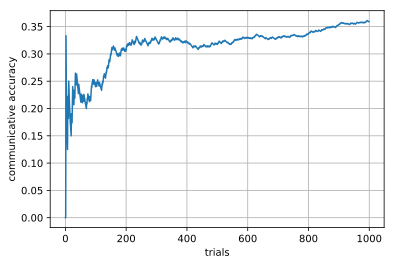

In [28]:
population = [[[[3, 1], [0, 2]], [[1,0], [2,4]], [0, 0, 0, 0]],
              [[[1, 0], [0, 1]], [[2,0], [0,1]], [0, 0, 0, 0]],
              [[[0, 1], [1, 0]], [[0,1], [1,0]], [0, 0, 0, 0]]]

results = simulation(population, 1000)

plt.plot(results)
plt.xlabel("trials")
plt.ylabel("communicative accuracy")
plt.grid()

4. **[optional]** Who communicates with who in a population? What other ways could you model this, and how would you start adjusting the code to implement your model? Hint: what if people only talked to people who were ‘near’ them? 
5. **[optional]** Rather than explicitly providing a population to evaluate, can you come up with some code that generates a population of a specified size with random production and reception matrices?